# Cryptocurrency Clustering Analysis

## Load and Inspect Data

In [4]:

import pandas as pd

# Load the crypto_market_data.csv into a DataFrame
crypto_df = pd.read_csv('Resources\crypto_market_data.csv')

# Set the index to the "coin_id" column
crypto_df.set_index("coin_id", inplace=True)

# Get the summary statistics
crypto_df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


## Data Normalization

In [5]:

from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_df)

# Create a DataFrame with the scaled data and set the "coin_id" index
scaled_crypto_df = pd.DataFrame(scaled_data, columns=crypto_df.columns, index=crypto_df.index)

# Display the first five rows of the scaled DataFrame
scaled_crypto_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


## Finding the Best Value for k (Elbow Method)

c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:14

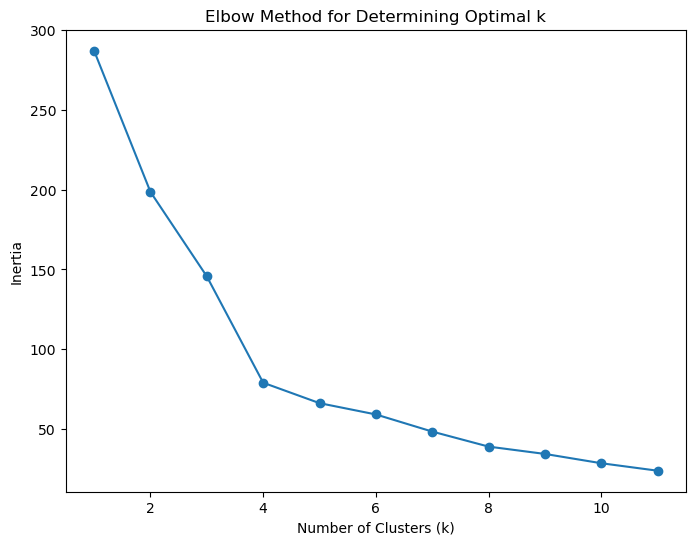

In [6]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values from 1 to 11
k_values = range(1, 12)

# Initialize an empty list to store inertia values
inertia_values = []

# Compute the inertia for each k value using a for loop
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_crypto_df)
    inertia_values.append(kmeans.inertia_)

# Plot a line chart with all the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal k")
plt.show()


## Clustering Cryptocurrencies with K-Means (Original Data)

c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: title={'center': 'Crypto Clustering'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

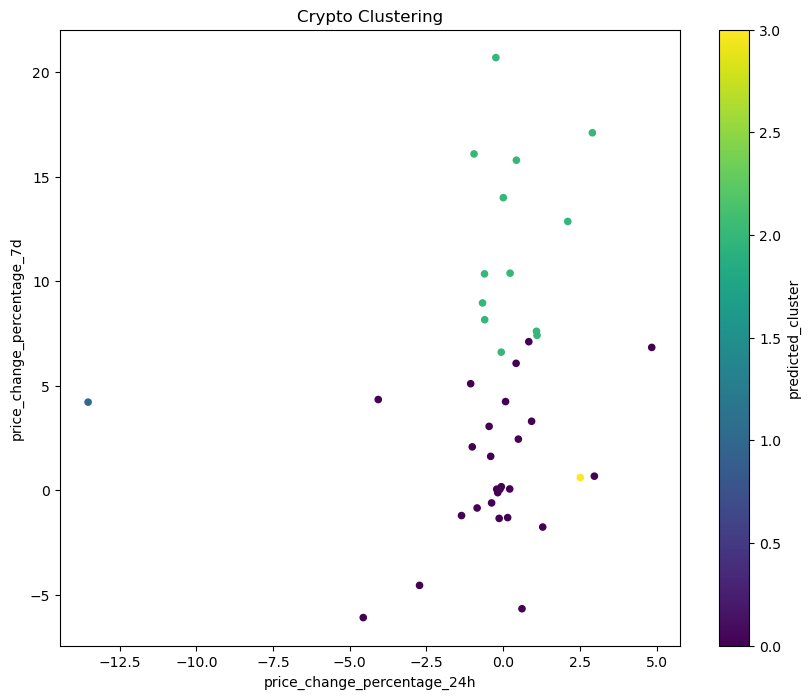

In [7]:

# Based on the elbow plot, we will select the best value for k.
best_k = 4

# Initialize the K-means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the model using the original scaled DataFrame
kmeans_model.fit(scaled_crypto_df)

# Predict the clusters to group the cryptocurrencies using the original scaled DataFrame
predicted_clusters = kmeans_model.predict(scaled_crypto_df)

# Create a copy of the original data and add a new column with the predicted clusters
clustered_df = crypto_df.copy()
clustered_df["predicted_cluster"] = predicted_clusters

# Create a scatterplot with price_change_percentage_24h and price_change_percentage_7d
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", 
                          c="predicted_cluster", colormap="viridis", figsize=(10, 8), title="Crypto Clustering")


## Optimizing Clusters with Principal Component Analysis (PCA)

In [8]:

from sklearn.decomposition import PCA

# Perform PCA to reduce the features to three principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_crypto_df)

# Create a DataFrame with the PCA data and set the "coin_id" index
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=crypto_df.index)

# Display the first five rows of the PCA DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Explained Variance of PCA Components

In [9]:

# Retrieve the explained variance to determine how much information can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

explained_variance, total_explained_variance


(array([0.3719856 , 0.34700813, 0.17603793]), 0.895031657030984)

## Finding the Best Value for k Using PCA Data (Elbow Method)

c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:14

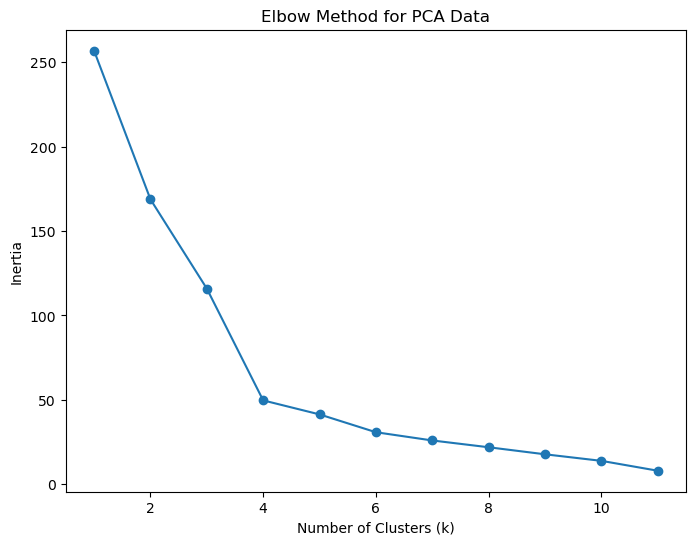

In [10]:

# Using the elbow method on the PCA data to find the best value for k
k_values_pca = range(1, 12)
inertia_values_pca = []

for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_values_pca.append(kmeans_pca.inertia_)

# Plot a line chart with all the inertia values for PCA data
plt.figure(figsize=(8, 6))
plt.plot(k_values_pca, inertia_values_pca, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for PCA Data")
plt.show()


## Clustering Cryptocurrencies with K-Means (PCA Reduced Data)

c:\Users\Kene Ezeagba\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: title={'center': 'PCA Reduced Crypto Clustering'}, xlabel='PC1', ylabel='PC2'>

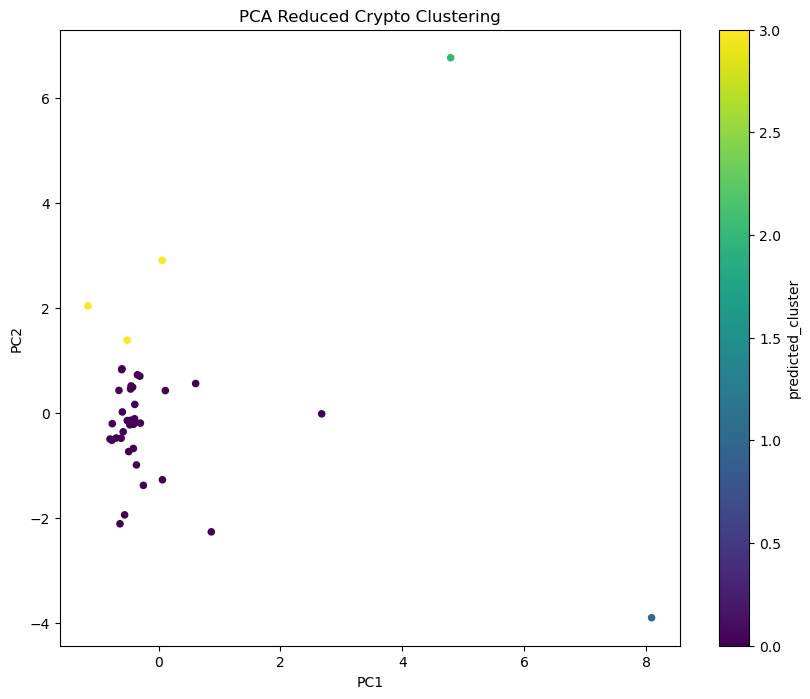

In [11]:

# Reducing the PCA data to 2 components for simplicity
pca_df_reduced = pca_df.iloc[:, :2]  # Selecting only PC1 and PC2

# Initialize and fit KMeans with k=4 on the reduced PCA data
kmeans_pca_reduced = KMeans(n_clusters=4, random_state=0)
kmeans_pca_reduced.fit(pca_df_reduced)

# Predict clusters on the reduced PCA data
pca_clusters_reduced = kmeans_pca_reduced.predict(pca_df_reduced)

# Add the predicted clusters to the reduced PCA DataFrame
pca_df_reduced["predicted_cluster"] = pca_clusters_reduced

# Create a scatterplot using the reduced PCA data
pca_df_reduced.plot.scatter(x="PC1", y="PC2", c="predicted_cluster", colormap="viridis", figsize=(10, 8), title="PCA Reduced Crypto Clustering")
